Loading functions

In [25]:
%load_ext autoreload
%autoreload 2

from utils import *
from dual import *

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### voice data prep

In [9]:
data_voice_cut = load_file('voice500')

In [10]:
data_size = len(data_voice_cut.index)

voice_X = data_voice_cut.iloc[:, :-1]
voice_y = data_voice_cut.iloc[:, -1]

# code categories to -1/1
gender_encoder = LabelEncoder()
voice_y = np.array(gender_encoder.fit_transform(voice_y))
voice_y = voice_y * 2 - 1

# normalize data
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(voice_X)
voice_X = np.array(scaler.transform(voice_X))
voice_X = voice_X[:,0:2]

model: SVC(C=1, kernel='linear')


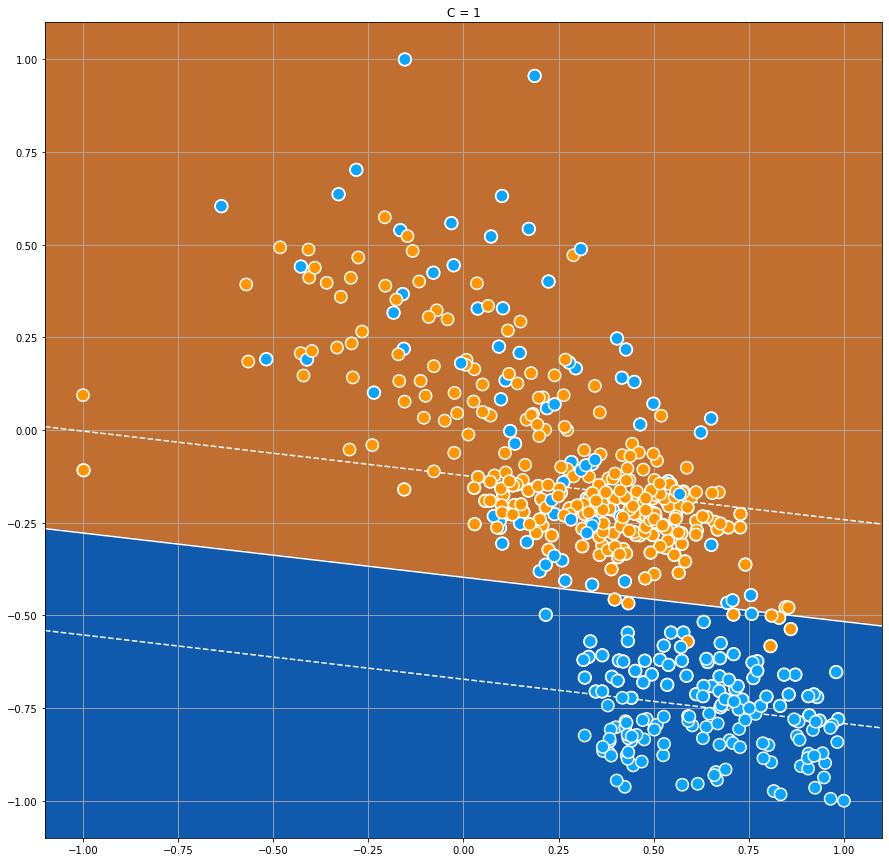

model: [ 0.35089486 -0.91116274 -0.27481643  0.1       ]
correlation with the rademacher vector: 10.915393454995463 0.021830786909990928


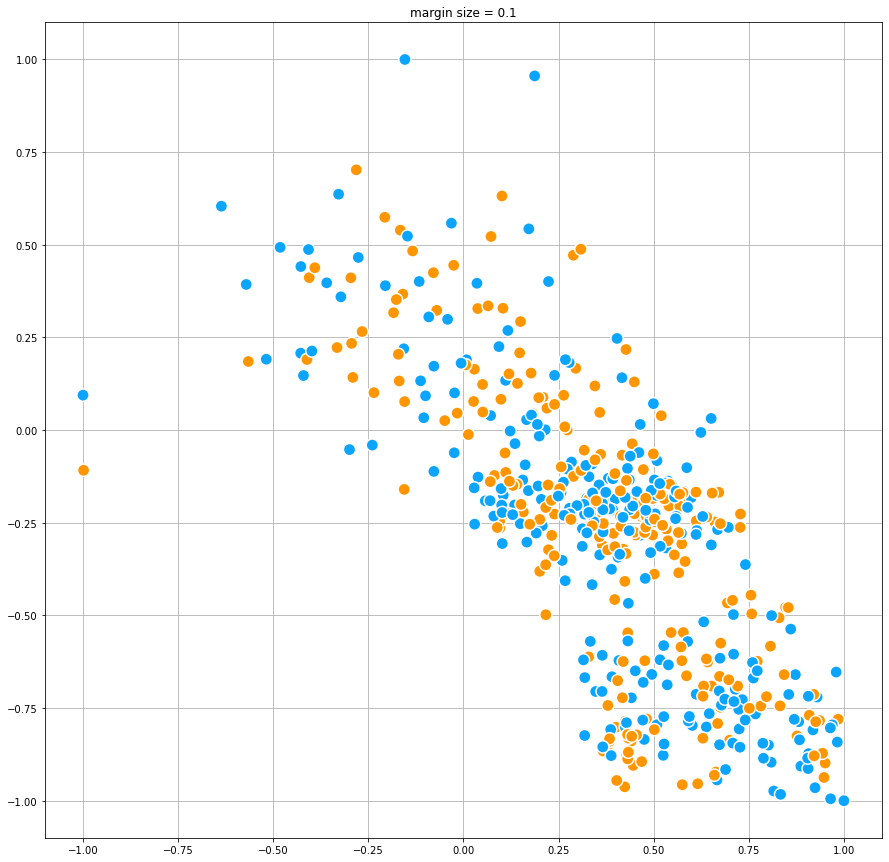

model: [ 0.23974005 -0.77759909 -0.32298482  0.1       ]
correlation with the rademacher vector: 10.855484829143982 0.021710969658287966


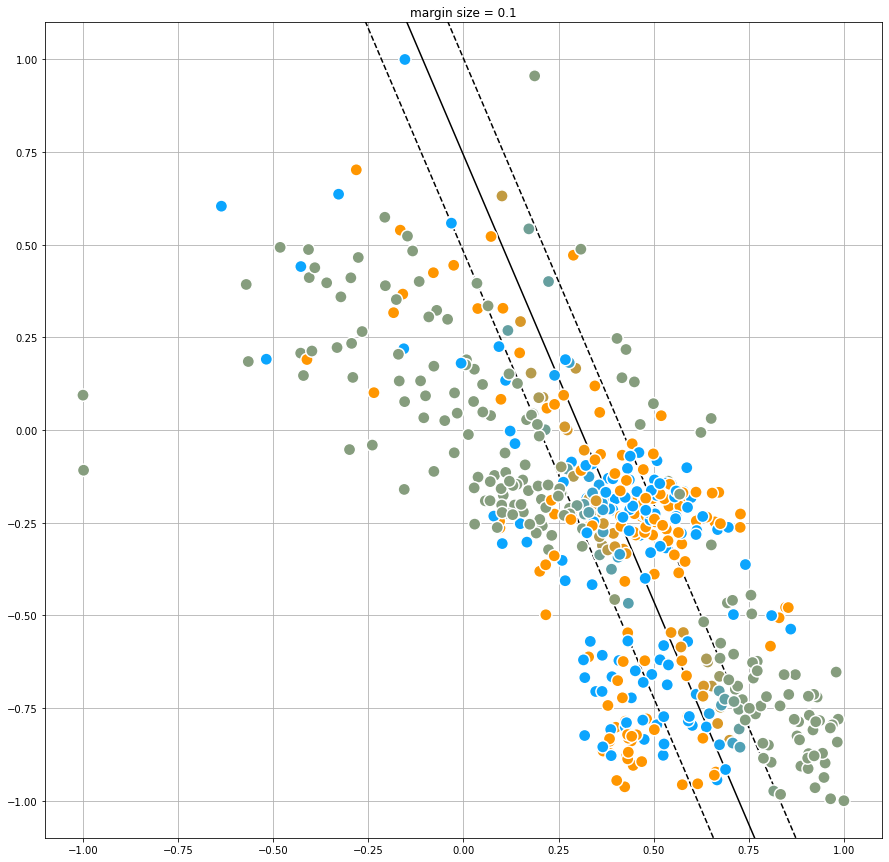

In [229]:
random = np.array([rd.randint(0, 1) * 2 - 1 for x in range(data_size)])

mar = 0.1
bound = 3
save = True
figsize=(15,15)

process_dataset(
    X=voice_X, Y=voice_y, radvec=random, model_type="svc",
    margin=1, bound=1e-12,
    figsize=[15,15], dotsize=150, lim_padding=0.1, color_bar=False, verbose=True,
    save_image=save)


process_dataset(
    X=voice_X, Y=voice_y, radvec=random, model_type="margin_loss",
    method='da', kwargs={'maxiter':1000, 'initial_temp':50000, 'accept':-5},
    margin=mar, bound=bound,
    figsize=[15,15], dotsize=150, lim_padding=0.1, color_bar=False, verbose=True,
    dot_show_radvec=True, draw_line=False, save_image=save)

process_dataset(
    X=voice_X, Y=voice_y, radvec=random, model_type="margin_loss",
    method='da', kwargs={'maxiter':1000, 'initial_temp':50000, 'accept':-5},
    margin=mar, bound=bound,
    figsize=figsize, dotsize=150, lim_padding=0.1, color_bar=False, verbose=True,
    dot_show_radvec=False, save_image=save)


In [95]:
from utils import _margin_loss
X = [[[0.37295855, -0.28423405]]]
Y = [1]

_margin_loss([0.69438328, 0.78310346], -0.17278221, 0.1, X,Y)

array([[1.]])

In [92]:
np.mean(voice_X, axis=0)

array([ 0.37295855, -0.28423405])

In [123]:
np.linalg.norm([-0.23584045,  0.18302733])

0.2985292638639157

## Plotting dual SVM

### Poly

     pcost       dcost       gap    pres   dres
 0:  1.2027e+06 -7.0990e+07  1e+08  5e-01  2e-12
 1:  1.8588e+06 -1.1569e+07  1e+07  7e-12  7e-12
 2:  1.6049e+05 -1.4482e+06  2e+06  3e-12  2e-12
 3:  2.3973e+03 -2.3424e+05  2e+05  2e-12  1e-12
 4: -1.0837e+04 -9.4652e+04  8e+04  2e-12  2e-12
 5: -1.5905e+04 -4.2643e+04  3e+04  5e-13  2e-12
 6: -1.9294e+04 -3.6312e+04  2e+04  2e-13  1e-12
 7: -2.1459e+04 -3.0944e+04  9e+03  9e-13  2e-12
 8: -2.1989e+04 -2.8560e+04  7e+03  2e-16  1e-12
 9: -2.3617e+04 -2.5127e+04  2e+03  2e-13  2e-12
10: -2.3797e+04 -2.4626e+04  8e+02  5e-12  2e-12
11: -2.4032e+04 -2.4276e+04  2e+02  9e-12  2e-12
12: -2.4105e+04 -2.4176e+04  7e+01  1e-12  2e-12
13: -2.4131e+04 -2.4142e+04  1e+01  1e-12  2e-12
14: -2.4136e+04 -2.4136e+04  2e-01  1e-12  2e-12
15: -2.4136e+04 -2.4136e+04  2e-03  2e-12  2e-12
Optimal solution found.
40 support vectors out of 140 points
training accuracy: 131 out of 140


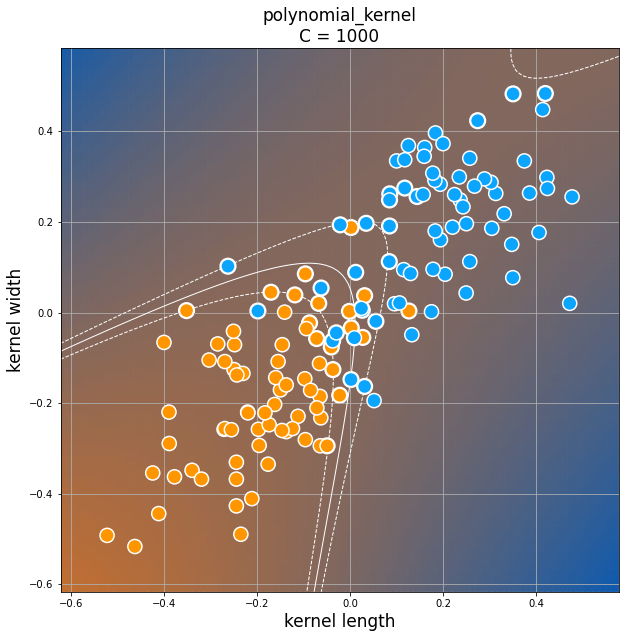

In [102]:
data = data_seeds

X = data.drop('class', axis=1)
y = data['class']

dual(X, y, kernel=polynomial_kernel, C=1000, figsize=[10,10], dotsize=200, padding=0.1, save_path=None, fontsize=17)

# Animation
#for c in np.logspace(-1, 5, 50):
#    dual(X, y, kernel=polynomial_kernel, C=c, figsize=[15,15], dotsize=200, padding=0.1, save_path='images/seeds_poly/', fontsize=17)

### Gaussian

     pcost       dcost       gap    pres   dres
 0:  5.7153e+06 -4.0925e+07  5e+07  2e-13  3e-12
 1:  1.5242e+06 -3.2543e+06  5e+06  5e-13  3e-12
 2:  2.0868e+05 -5.8450e+05  8e+05  5e-13  2e-12
 3:  8.9719e+02 -1.2498e+05  1e+05  2e-13  2e-12
 4: -1.3271e+04 -8.0179e+04  7e+04  1e-12  2e-12
 5: -1.9596e+04 -4.2916e+04  2e+04  2e-12  2e-12
 6: -2.1413e+04 -4.2996e+04  2e+04  2e-16  1e-12
 7: -2.3498e+04 -3.8580e+04  2e+04  4e-12  2e-12
 8: -2.5301e+04 -3.6797e+04  1e+04  1e-12  2e-12
 9: -2.5989e+04 -3.5395e+04  9e+03  4e-12  2e-12
10: -2.7242e+04 -3.2440e+04  5e+03  2e-12  2e-12
11: -2.7443e+04 -3.1225e+04  4e+03  5e-13  2e-12
12: -2.7635e+04 -3.1043e+04  3e+03  3e-12  2e-12
13: -2.8524e+04 -2.9794e+04  1e+03  5e-13  2e-12
14: -2.8884e+04 -2.9230e+04  3e+02  5e-12  2e-12
15: -2.9012e+04 -2.9055e+04  4e+01  5e-12  2e-12
16: -2.9030e+04 -2.9030e+04  5e-01  4e-12  2e-12
17: -2.9030e+04 -2.9030e+04  5e-03  7e-12  2e-12
Optimal solution found.
71 support vectors out of 140 points
training 

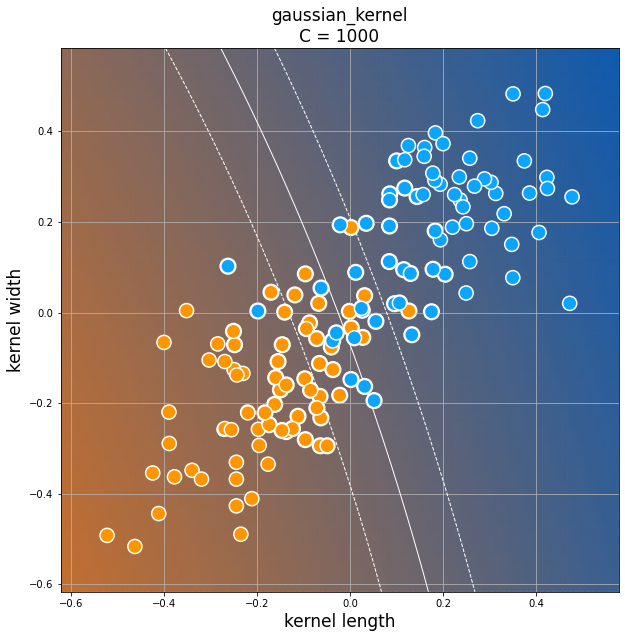

In [85]:
dual(X, y, kernel=gaussian_kernel, C=1000, figsize=[10,10], dotsize=200, padding=0.1, save_path=None, fontsize=17)

# Animation
#for c in np.logspace(-1, 5, 50):
#    dual(X, y, kernel=gaussian_kernel, C=c, figsize=[15,15], dotsize=200, padding=0.1, save_path='images/seeds_gauss/', fontsize=17)

### Synthetic data (gaussian)

In [89]:
def gen_non_lin_separable_data():
        mean1 = [-1, 2]
        mean2 = [1, -1]
        mean3 = [4, -4]
        mean4 = [-4, 4]
        cov = [[1.0,0.8], [0.8, 1.0]]
        X1 = np.random.multivariate_normal(mean1, cov, 50)
        X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 50)
        X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
        return X1, y1, X2, y2

def split_train(X1, y1, X2, y2):
        X1_train = X1[:90]
        y1_train = y1[:90]
        X2_train = X2[:90]
        y2_train = y2[:90]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train
    
X1, y1, X2, y2 = gen_non_lin_separable_data()
X_train, y_train = split_train(X1, y1, X2, y2)

dual(X_train, y_train, kernel=gaussian_kernel, C=100, figsize=[15,15], fontsize=15, dotsize=200, padding=0.1, color_bar=False, verbose=True)

     pcost       dcost       gap    pres   dres
 0:  5.3664e+04 -4.2772e+05  7e+05  2e-01  6e-14
 1:  2.6217e+04 -4.8172e+04  8e+04  1e-02  6e-14
 2:  4.3726e+03 -5.7301e+03  1e+04  3e-14  4e-14
 3:  5.7479e+02 -8.4185e+02  1e+03  5e-14  2e-14
 4:  5.6302e+01 -1.4241e+02  2e+02  2e-15  6e-15
 5: -5.1088e+00 -4.0029e+01  3e+01  7e-16  2e-15
 6: -1.2015e+01 -3.3530e+01  2e+01  5e-16  2e-15
 7: -2.2581e+01 -3.3011e+01  1e+01  4e-15  3e-15
 8: -2.5255e+01 -2.7322e+01  2e+00  1e-14  3e-15
 9: -2.6075e+01 -2.6131e+01  6e-02  7e-15  4e-15
10: -2.6099e+01 -2.6100e+01  6e-04  3e-15  3e-15
11: -2.6099e+01 -2.6099e+01  6e-06  7e-15  3e-15
Optimal solution found.
11 support vectors out of 180 points
training accuracy: 180 out of 180


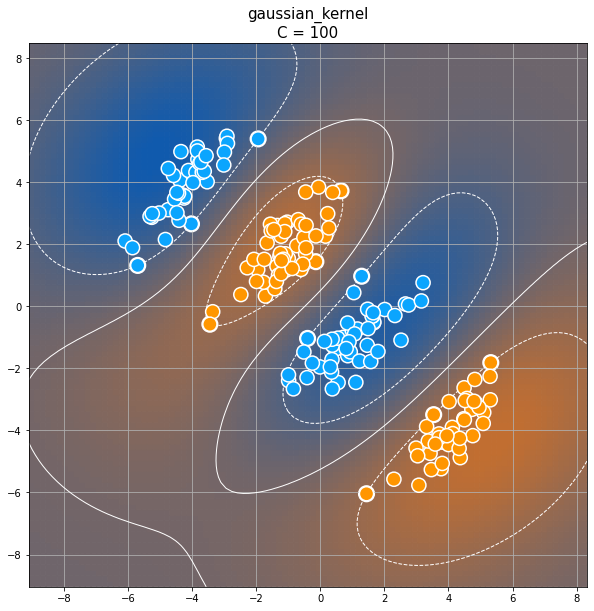

In [117]:
dual(X_train, y_train, kernel=gaussian_kernel, C=100, figsize=[10,10], fontsize=15, dotsize=200, padding=3, color_bar=False, verbose=True)

# Animation
#for c in np.logspace(-3, 1.7, 50):
#    print(c)
#    dual(X_train, y_train, kernel=gaussian_kernel, C=c, save_path='images/synth_gauss/',
#         figsize=[15,15], fontsize=15, dotsize=200, padding=2, color_bar=False, verbose=True)

### Iris data (non-separable)

     pcost       dcost       gap    pres   dres
 0:  6.1486e+03 -3.8143e+05  4e+05  1e-13  2e-13
 1: -2.9206e+02 -5.7896e+04  6e+04  6e-14  3e-13
 2: -5.4111e+03 -1.5288e+04  1e+04  4e-14  4e-13
 3: -7.2864e+03 -1.0733e+04  3e+03  3e-14  4e-13
 4: -8.0953e+03 -9.7152e+03  2e+03  5e-13  4e-13
 5: -8.4883e+03 -9.1643e+03  7e+02  1e-13  4e-13
 6: -8.7124e+03 -8.8808e+03  2e+02  2e-13  5e-13
 7: -8.7660e+03 -8.8099e+03  4e+01  2e-13  5e-13
 8: -8.7814e+03 -8.7904e+03  9e+00  4e-13  5e-13
 9: -8.7853e+03 -8.7855e+03  2e-01  1e-13  6e-13
10: -8.7854e+03 -8.7854e+03  2e-03  7e-13  6e-13
Optimal solution found.
120 support vectors out of 150 points
training accuracy: 108 out of 150


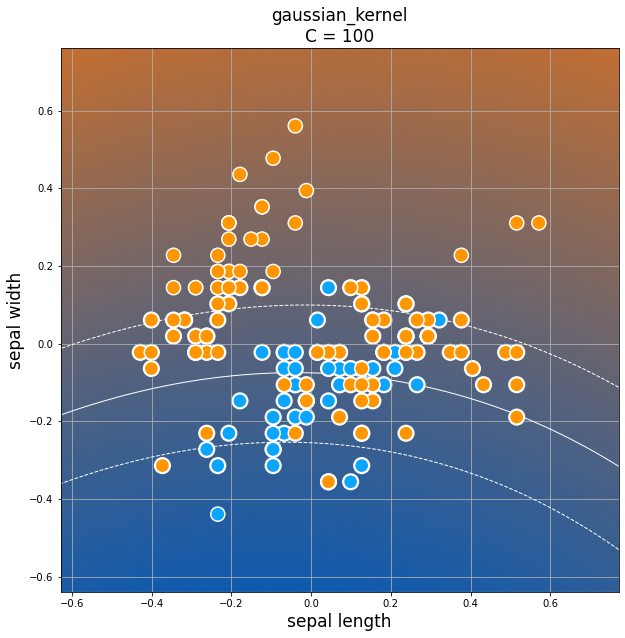

     pcost       dcost       gap    pres   dres
 0:  1.1705e+06 -3.6455e+07  4e+07  8e-12  3e-12
 1:  4.8780e+05 -5.1966e+06  6e+06  9e-12  3e-12
 2:  2.1673e+03 -6.6865e+05  7e+05  2e-12  3e-12
 3: -4.6966e+04 -1.6839e+05  1e+05  3e-12  3e-12
 4: -6.2221e+04 -1.1665e+05  5e+04  5e-13  4e-12
 5: -6.8208e+04 -9.8657e+04  3e+04  6e-12  4e-12
 6: -7.1924e+04 -9.1170e+04  2e+04  5e-12  3e-12
 7: -7.5022e+04 -8.5628e+04  1e+04  2e-12  4e-12
 8: -7.7205e+04 -8.1924e+04  5e+03  1e-12  4e-12
 9: -7.8673e+04 -7.9728e+04  1e+03  8e-13  4e-12
10: -7.9056e+04 -7.9204e+04  1e+02  9e-13  4e-12
11: -7.9120e+04 -7.9123e+04  3e+00  1e-11  5e-12
12: -7.9121e+04 -7.9122e+04  6e-02  6e-12  5e-12
Optimal solution found.
150 support vectors out of 150 points
training accuracy: 116 out of 150


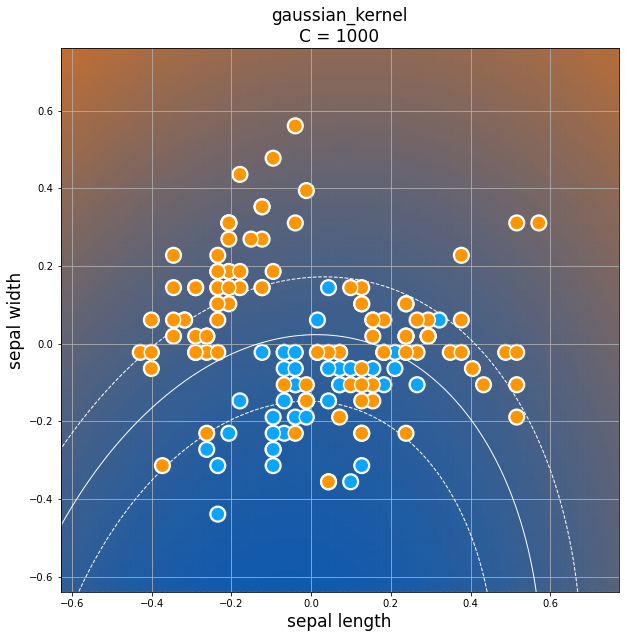

     pcost       dcost       gap    pres   dres
 0: -3.3528e+02 -9.3604e+03  1e+04  3e-01  3e-14
 1: -3.9482e+02 -1.6688e+03  1e+03  3e-03  3e-14
 2: -6.0624e+02 -9.4587e+02  3e+02  6e-04  3e-14
 3: -6.6155e+02 -8.8679e+02  2e+02  3e-04  4e-14
 4: -6.9382e+02 -8.4506e+02  2e+02  2e-04  3e-14
 5: -7.2604e+02 -7.9919e+02  7e+01  6e-05  4e-14
 6: -7.4052e+02 -7.7937e+02  4e+01  3e-05  4e-14
 7: -7.5186e+02 -7.6272e+02  1e+01  5e-06  5e-14
 8: -7.5581e+02 -7.5774e+02  2e+00  5e-07  5e-14
 9: -7.5643e+02 -7.5697e+02  5e-01  6e-08  5e-14
10: -7.5667e+02 -7.5671e+02  5e-02  6e-09  5e-14
11: -7.5669e+02 -7.5669e+02  5e-04  6e-11  5e-14
Optimal solution found.
91 support vectors out of 150 points
training accuracy: 117 out of 150


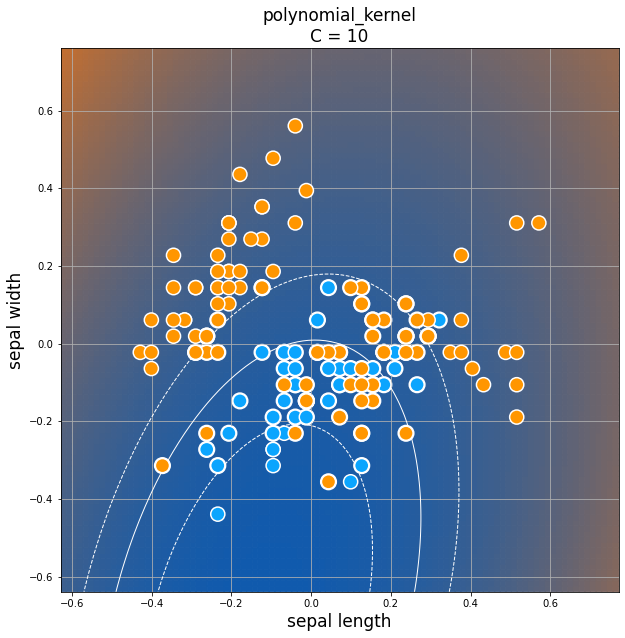

     pcost       dcost       gap    pres   dres
 0:  1.3142e+04 -7.3511e+05  1e+06  2e-01  2e-13
 1:  4.7594e+03 -8.4989e+04  9e+04  1e-02  3e-13
 2: -2.1761e+03 -2.2899e+04  2e+04  2e-03  3e-13
 3: -4.7205e+03 -1.2459e+04  8e+03  5e-04  3e-13
 4: -6.0184e+03 -8.5605e+03  3e+03  1e-04  4e-13
 5: -6.4210e+03 -8.0034e+03  2e+03  5e-05  4e-13
 6: -6.6458e+03 -7.5665e+03  9e+02  2e-05  4e-13
 7: -6.7701e+03 -7.3905e+03  6e+02  9e-06  4e-13
 8: -6.8503e+03 -7.1658e+03  3e+02  4e-07  5e-13
 9: -6.9647e+03 -7.0043e+03  4e+01  6e-09  5e-13
10: -6.9802e+03 -6.9841e+03  4e+00  6e-10  5e-13
11: -6.9818e+03 -6.9819e+03  1e-01  8e-12  5e-13
12: -6.9819e+03 -6.9819e+03  2e-03  1e-13  5e-13
Optimal solution found.
101 support vectors out of 150 points
training accuracy: 117 out of 150


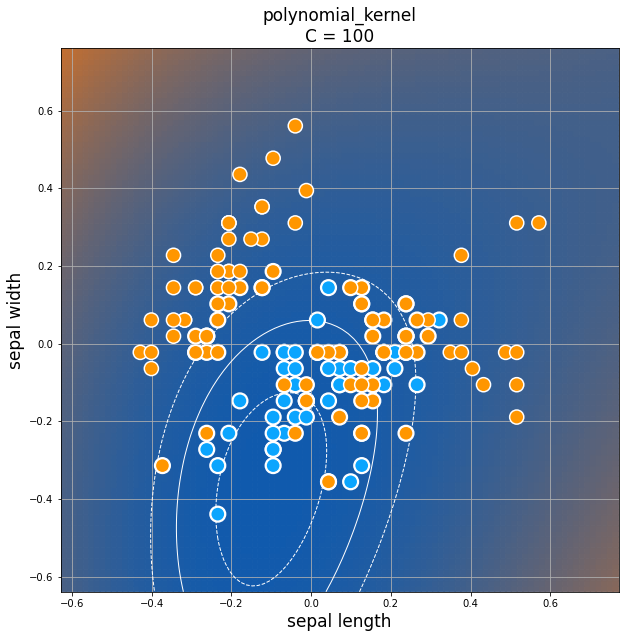

     pcost       dcost       gap    pres   dres
 0:  1.7378e+06 -7.1503e+07  1e+08  2e-01  3e-12
 1:  8.5407e+05 -7.8403e+06  9e+06  1e-02  6e-12
 2:  2.1234e+05 -2.1089e+06  2e+06  2e-03  3e-12
 3:  2.1753e+04 -7.5971e+05  8e+05  5e-04  2e-12
 4: -4.0738e+04 -2.1353e+05  2e+05  1e-12  4e-12
 5: -5.2384e+04 -1.0014e+05  5e+04  2e-12  3e-12
 6: -5.9085e+04 -7.9829e+04  2e+04  2e-12  4e-12
 7: -6.1599e+04 -7.6734e+04  2e+04  9e-12  3e-12
 8: -6.2297e+04 -7.2584e+04  1e+04  1e-12  4e-12
 9: -6.3773e+04 -7.0226e+04  6e+03  5e-12  5e-12
10: -6.5364e+04 -6.7046e+04  2e+03  6e-12  4e-12
11: -6.5818e+04 -6.6255e+04  4e+02  5e-12  4e-12
12: -6.5975e+04 -6.6012e+04  4e+01  1e-11  4e-12
13: -6.5992e+04 -6.5992e+04  7e-01  1e-11  4e-12
14: -6.5992e+04 -6.5992e+04  7e-03  1e-11  4e-12
Optimal solution found.
122 support vectors out of 150 points
training accuracy: 121 out of 150


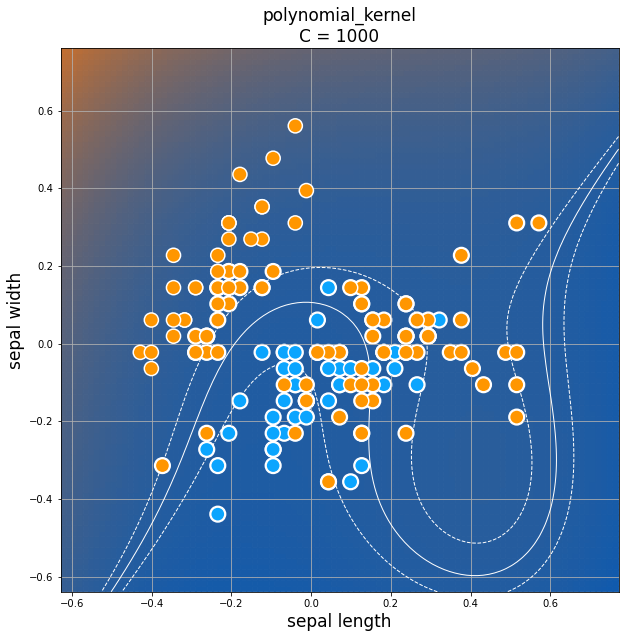

In [106]:
data = data_iris1

X = data.drop('class', axis=1)
y = data['class']

dual(X, y, kernel=gaussian_kernel, C=100, figsize=[10,10], dotsize=200, padding=0.2, save_path=None, fontsize=17)
dual(X, y, kernel=gaussian_kernel, C=1000, figsize=[10,10], dotsize=200, padding=0.2, save_path=None, fontsize=17)
dual(X, y, kernel=polynomial_kernel, C=10, figsize=[10,10], dotsize=200, padding=0.2, save_path=None, fontsize=17)
dual(X, y, kernel=polynomial_kernel, C=100, figsize=[10,10], dotsize=200, padding=0.2, save_path=None, fontsize=17)
dual(X, y, kernel=polynomial_kernel, C=1000, figsize=[10,10], dotsize=200, padding=0.2, save_path=None, fontsize=17)


     pcost       dcost       gap    pres   dres
 0:  1.7215e+06 -2.9012e+07  4e+07  7e-02  5e-13
 1:  6.9096e+05 -4.0062e+06  5e+06  7e-03  1e-12
 2:  1.5807e+05 -7.3660e+05  9e+05  5e-04  6e-13
 3:  2.5540e+04 -1.5807e+05  2e+05  4e-05  6e-13
 4: -1.0154e+04 -4.5828e+04  4e+04  9e-13  7e-13
 5: -1.5014e+04 -3.1911e+04  2e+04  2e-13  6e-13
 6: -1.6910e+04 -2.6353e+04  9e+03  3e-12  7e-13
 7: -1.8176e+04 -2.1866e+04  4e+03  1e-12  7e-13
 8: -1.9082e+04 -1.9913e+04  8e+02  3e-12  8e-13
 9: -1.9226e+04 -1.9555e+04  3e+02  5e-12  9e-13
10: -1.9289e+04 -1.9406e+04  1e+02  2e-12  8e-13
11: -1.9309e+04 -1.9368e+04  6e+01  3e-12  9e-13
12: -1.9329e+04 -1.9335e+04  5e+00  8e-12  8e-13
13: -1.9332e+04 -1.9332e+04  1e-01  9e-13  9e-13
14: -1.9332e+04 -1.9332e+04  1e-03  5e-13  8e-13
Optimal solution found.
47 support vectors out of 140 points
training accuracy: 130 out of 140


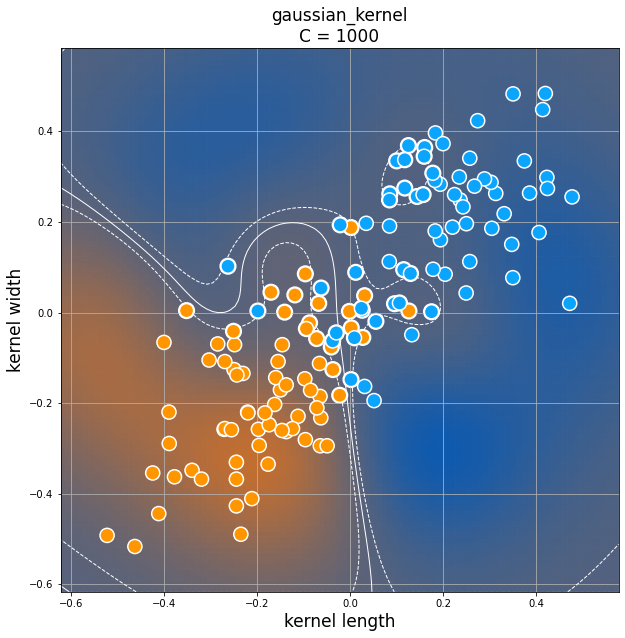

In [120]:
data = data_seeds

X = data.drop('class', axis=1)
y = data['class']

dual(X, y, kernel=gaussian_kernel, C=1000, figsize=[10,10], dotsize=200, padding=0.1, save_path=None, fontsize=17)